In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
lowrankdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top10/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
restmat = []
nbackmat = []
emoidmat = []
race = []
sex = []
age = []

a,b = np.triu_indices(264,1)

for sub in pncdemo['age_at_cnb']:
    try:
        ra = pncdemo['Race'][sub]
        ag = pncdemo['age_at_cnb'][sub]
        se = pncdemo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{lowrankdir}/{sub}_task-resttop10_fc.npy')
        n = np.load(f'{lowrankdir}/{sub}_task-nbacktop10_fc.npy')
        e = np.load(f'{lowrankdir}/{sub}_task-emoidtop10_fc.npy')
        r = remap(vec2mat(r))
        n = remap(vec2mat(n))
        e = remap(vec2mat(e))
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(r[a,b])
        nback.append(n[a,b])
        emoid.append(e[a,b])
        restmat.append(r)
        nbackmat.append(n)
        emoidmat.append(e)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
restmat = np.stack(restmat)
nbackmat = np.stack(nbackmat)
emoidmat = np.stack(emoidmat)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

age = (age-np.mean(age))/np.std(age)

print([a.shape for a in [rest, nback, emoid, restmat, nbackmat, emoidmat, race, sex, age]])

[(1193, 34716), (1193, 34716), (1193, 34716), (1193, 264, 264), (1193, 264, 264), (1193, 264, 264), (1193,), (1193,), (1193,)]


In [7]:
from sklearn.linear_model import Ridge, LogisticRegression
import torch

age_reg = Ridge(alpha=100).fit(np.concatenate([rest, nback, emoid], axis=0), np.concatenate([age, age, age]))
age_w = torch.from_numpy(age_reg.coef_).float().cuda()
age_i = age_reg.intercept_

print(age_i)

-0.11856799409134895


In [3]:
import pickle

mygen3 = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/mygen3.pkl', 'rb'))

print('Done')

Done


In [8]:
import torch

# age_w = torch.from_numpy(mygen3['age_w']).float().cuda()
# age_i = mygen3['age_i']
sex_w = torch.from_numpy(mygen3['sex_w']).float().cuda()
sex_i = mygen3['sex_i']
race_w = torch.from_numpy(mygen3['race_w']).float().cuda()
race_i = mygen3['race_i']
rest_w = torch.from_numpy(mygen3['rest_w']).float().cuda()
rest_i = mygen3['rest_i']
nback_w = torch.from_numpy(mygen3['nback_w']).float().cuda()
nback_i = mygen3['nback_i']
emoid_w = torch.from_numpy(mygen3['emoid_w']).float().cuda()
emoid_i = mygen3['emoid_i']

print(age_w.shape, age_i, sex_w.shape, sex_i, race_w.shape, race_i)

torch.Size([34716]) -0.11856799409134895 torch.Size([34716]) -5.628305026005052 torch.Size([34716]) 13.770769923836573


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import random

class VAE(nn.Module):
    def __init__(self, fcd, ld, matsz, rank):
        super(VAE, self).__init__()
        self.fcd = fcd
        self.ld = ld
        self.matsz = matsz
        self.rank = rank
        self.enc1 = nn.Linear(fcd, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, matsz*rank).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()/(10**0.5)
    
    def dec(self, z, age, sex, race, rest, nback, emoid):
        z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
                       rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        x = x.reshape(len(z), self.matsz, self.rank)
        x = torch.einsum('abc,adc->abd', x, x)
        return x

    def vectorize(self, x):
        a,b = np.triu_indices(self.matsz, 1)
        return x[:,a,b]

def latent_loss(z):
    C = z.T@z
    mu = torch.mean(z, dim=0)
    tgt1 = torch.eye(z.shape[-1]).float().cuda()*len(z)/10
    tgt2 = torch.zeros(z.shape[-1]).float().cuda()
    lossC = rmse(C, tgt1)
    lossmu = rmse(mu, tgt2)
    return lossC, lossmu, C, mu

def decor_loss(z, age, sex, race):
    age = age - torch.mean(age)
    sex = sex - torch.mean(sex)
    race = race - torch.mean(race)
    agep = torch.einsum('n,nz->z', age, z)
    sexp = torch.einsum('n,nz->z', sex, z)
    racep = torch.einsum('n,nz->z', race, z)
    tgt = torch.zeros(z.shape[-1]).float().cuda()
    loss_age = rmse(agep, tgt)
    loss_sex = rmse(sexp, tgt)
    loss_race = rmse(racep, tgt)
    return loss_age + loss_sex + loss_race

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

vae = VAE(rest.shape[-1], 30, 264, 5)
optim = torch.optim.Adam(vae.parameters(), lr=1e-4, weight_decay=0)

rest_t = torch.from_numpy(rest).float().cuda()
nback_t = torch.from_numpy(nback).float().cuda()
emoid_t = torch.from_numpy(emoid).float().cuda()
age_t = torch.from_numpy(age).float().cuda()
sex_t = torch.from_numpy(sex).float().cuda()
race_t = torch.from_numpy(race).float().cuda()

nepochs = 3000
pperiod = 50

ce = nn.CrossEntropyLoss()

for e in range(nepochs):
    if e % 3 == 0:
        tidx = 0
        x = rest_t
    elif e % 3 == 1:
        tidx = 1
        x = nback_t
    else:
        tidx = 2
        x = emoid_t
    task = torch.ones(len(x)).long().cuda()
    # Reconstruct
    optim.zero_grad()
    z = vae.enc(x)
    y = vae.dec(z, age_t, sex_t, race_t, task*(tidx == 0), task*(tidx == 1), task*(tidx == 2))
    y = vae.vectorize(y)
    lossC, lossmu, _, _ = latent_loss(z)
    lossDecor = decor_loss(z, age_t, sex_t, race_t)
    lossrec = rmse(x, y)
    # Generate
    tidx = random.randint(0,2)
    ag = torch.ones(100).float().cuda()*torch.randn(1)[0]
    sx = torch.ones(100).long().cuda()*random.randint(0,1)
    rc = torch.ones(100).long().cuda()*random.randint(0,1)
    task = torch.ones(100).long().cuda()
    z = vae.gen(100)
    y = vae.dec(z, ag, sx, rc, task*(tidx == 0), task*(tidx == 1), task*(tidx == 2))
    y = vae.vectorize(y)
    ag_hat = y@age_w + age_i
    sx_hat = y@sex_w + sex_i
    rc_hat = y@race_w + race_i
    rs_hat = y@rest_w + rest_i
    nb_hat = y@nback_w + nback_i
    em_hat = y@emoid_w + emoid_i
    age_loss = rmse(ag_hat, ag)
    sex_loss = ce(torch.stack([-sx_hat, sx_hat], dim=1), sx)
    race_loss = ce(torch.stack([-rc_hat, rc_hat], dim=1), rc)
    rest_loss = ce(torch.stack([-rs_hat, rs_hat], dim=1), task*(tidx == 0))
    nback_loss = ce(torch.stack([-nb_hat, nb_hat], dim=1), task*(tidx == 1))
    emoid_loss = ce(torch.stack([-em_hat, em_hat], dim=1), task*(tidx == 2))
    (lossC+lossmu+lossrec+lossDecor+0.001*age_loss+0.001*sex_loss+0.001*race_loss+0.001*rest_loss+0.001*nback_loss+0.001*emoid_loss).backward()
    optim.step()
    if e%pperiod == 0 or e == nepochs-1:
        print(f'{e} {pretty(lossC)} {pretty(lossmu)} {pretty(lossDecor)} {pretty(lossrec)} {pretty(age_loss)} {pretty(sex_loss)} {pretty(race_loss)}' + 
             f' {pretty(rest_loss)} {pretty(nback_loss)} {pretty(emoid_loss)}')

print('Done')

0 21.4735 0.0788 10.3362 0.3829 1.6276 11.4774 27.1604 9.6177 5.8359 0.0
50 21.2976 0.0517 3.8314 0.2944 1.9143 0.1565 0.1395 0.0067 0.004 0.001
100 21.2771 0.0568 4.0781 0.2151 0.1998 0.0 0.0085 0.0 0.0015 0.0
150 21.1713 0.0587 3.5238 0.2288 0.1922 0.0449 0.0019 0.0 0.0 0.0
200 21.1338 0.0461 3.4712 0.2026 0.3666 0.0001 0.0323 0.0032 0.0 0.0
250 21.2169 0.0751 7.4359 0.1934 0.2425 0.0 0.0 0.0 0.0001 0.052
300 20.3567 0.0557 5.0176 0.2095 0.1536 0.0 0.0 0.0 0.0 0.0
350 20.4432 0.0558 5.6718 0.1869 0.1948 0.0131 0.0 0.0 0.0 0.0
400 20.2142 0.0548 5.1173 0.182 0.1443 0.0013 0.0001 0.0 0.0 0.0
450 19.4964 0.0511 5.3951 0.1997 0.0873 0.0039 0.0005 0.0 0.0 0.0
500 19.7309 0.0565 4.2115 0.1793 0.1775 0.0073 0.0008 0.0 0.0 0.0
550 19.5844 0.0576 4.3914 0.1727 0.1335 0.0001 0.0001 0.0 0.0 0.0
600 18.7352 0.0572 4.0214 0.1941 0.083 0.0001 0.0148 0.0028 0.0 0.0
650 18.9569 0.0567 2.4845 0.1744 0.1552 0.0006 0.0001 0.0001 0.0 0.0
700 18.6471 0.0573 4.2087 0.1672 0.0827 0.0055 0.0001 0.0 0.0 0.0


(1000, 264, 264)


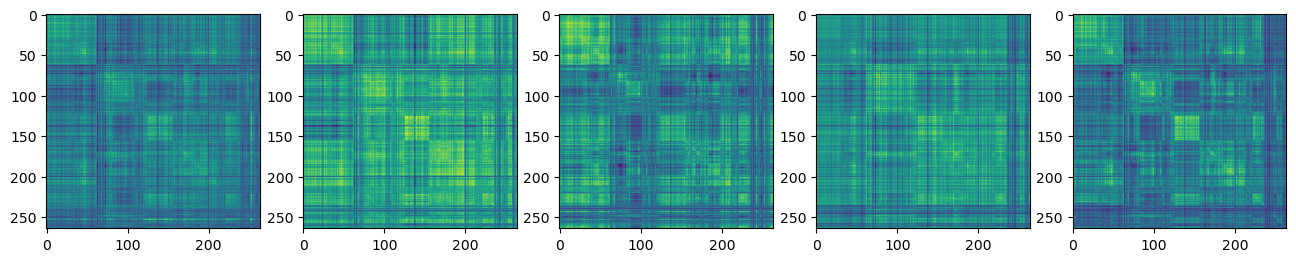

In [36]:
import matplotlib.pyplot as plt

n = 1000

with torch.no_grad():
    ag = 0*torch.ones(n).float().cuda()
    sx = 0*torch.ones(n).float().cuda()
    rc = 0*torch.ones(n).float().cuda()
    tidx = 0
    task = torch.ones(n).long().cuda()
    z = vae.gen(n)
    y = vae.dec(z, ag, sx, rc, task*(tidx == 0), task*(tidx == 1), task*(tidx == 2))
    y = y.detach().cpu().numpy()
    print(y.shape)

fig, ax = plt.subplots(1,5,figsize=(16,4))
ym = np.mean(y, axis=0)
ym2 = ym

ax[0].imshow(y[0])
ax[1].imshow(y[1])
ax[2].imshow(y[2])
ax[3].imshow(y[3])
ax[4].imshow(ym)

# fig.show()

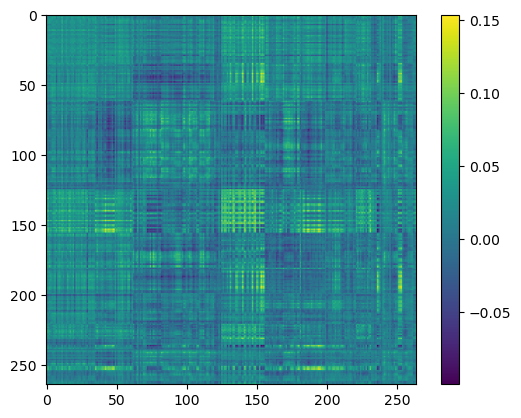

In [37]:
plt.imshow(ym2-ym1)
plt.colorbar()
plt.show()

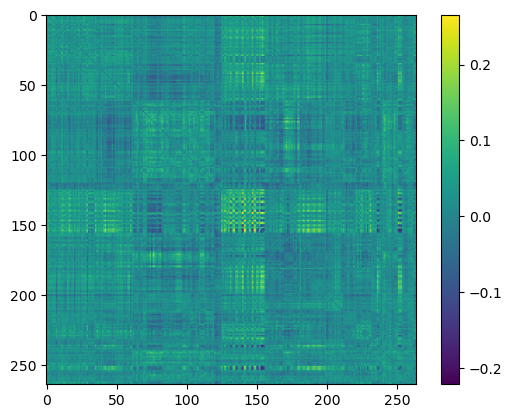

In [38]:
gt2 = np.mean(restmat[(race == 0)*(sex == 0)*(age > -1)], axis=0)
gt1 = np.mean(nbackmat[(race == 0)*(sex == 0)*(age > -1)], axis=0)

plt.imshow(gt2-gt1)
plt.colorbar()
plt.show()